In [2]:
# Importing libraries
import ast
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading data
data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

# Cleaning data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x)if pd.notna(x) else x)
df_DA = df[df['job_title_short']== 'Data Analyst'].copy()


c:\Users\Namitha john\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


<Axes: title={'center': 'Top 5 skills for Data Analyst in Month'}, ylabel='count'>

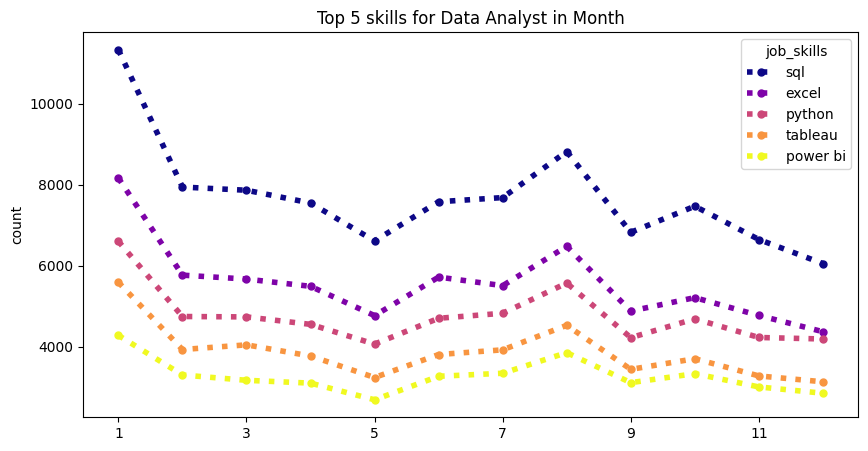

In [3]:
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month
df_DA_explode =df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index = 'job_posted_month_no', columns = 'job_skills', aggfunc = 'size',fill_value=0)
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')
df_DA_pivot.iloc[:, :5].plot(kind = 'line',
                             title = 'Top 5 skills for Data Analyst in Month',
                             ylabel='count',
                             xlabel='',
                             linewidth = 4,
                             linestyle = ':',
                             colormap = 'plasma',
                             marker = 'o',
                             markersize = 5,
                             figsize= (10,5)
                            

                                )


In [4]:

df_exploded = df_DA.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills','count'),
    median_salary = ('salary_year_avg','median')
)

skill_count = 30
skill_stats = skill_stats.sort_values(by='skill_count',ascending = False).head(skill_count)
skill_stats


,skill_count,median_salary
job_skills,,
sql,92428,92500.000000
excel,66860,84479.000000
python,57190,98500.000000
tableau,46455,95000.000000
power bi,39380,90000.000000
r,29996,92527.500000
sas,27998,90000.000000
powerpoint,13822,85000.000000
word,13562,80000.000000


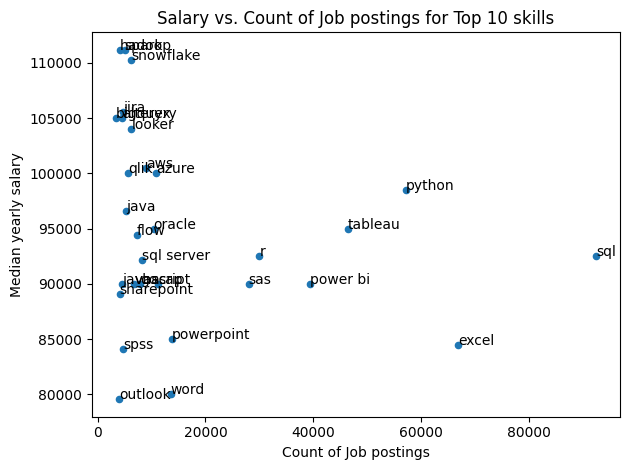

In [5]:
skill_stats.plot(kind = 'scatter',x = 'skill_count', y= 'median_salary')
plt.xlabel('Count of Job postings')
plt.ylabel('Median yearly salary')
plt.title('Salary vs. Count of Job postings for Top 10 skills')
plt.tight_layout()

for i,text in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],text)

In [6]:
pip install adjustText

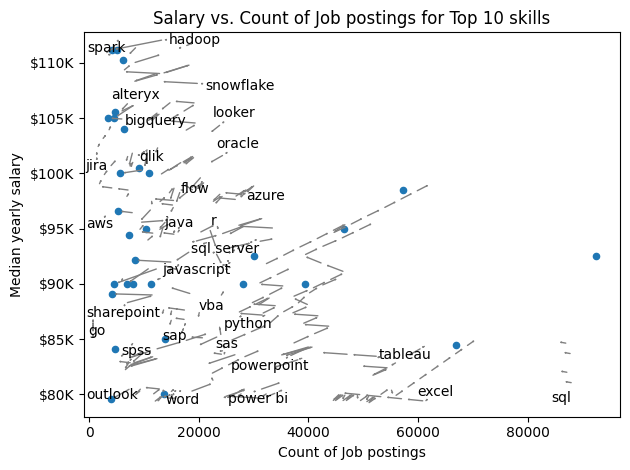

In [9]:
# fig, ax = plt.subplots()



from adjustText import adjust_text

skill_stats.plot(kind = 'scatter',x = 'skill_count', y= 'median_salary')

texts = []
for i,text in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i],skill_stats['median_salary'].iloc[i],text))  
    adjust_text(texts,arrowprops = dict(arrowstyle='->', color = 'gray', lw = 1))

    ax = plt.gca()
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y,pos: f'${int(y/1000)}K'))

plt.xlabel('Count of Job postings')
plt.ylabel('Median yearly salary')
plt.title('Salary vs. Count of Job postings for Top 10 skills')
plt.tight_layout()

